In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [18]:
def sin(x):
    return np.sin(x)

def cos(x):
    return np.cos(x)

def exp(x):
    return np.exp(x)

def noise(x, lvl):
    gaussian_noise = np.random.normal(np.mean(x), np.std(x) *lvl, x.shape[0])
    return x + gaussian_noise

def z_score(x):
    return (x - np.mean(x)) / np.std(x)

def log(x):
    return np.log(x)


In [3]:
tpf = np.load("variablestar_tpf.npy")
tpf_re = tpf.reshape((tpf.shape[0], 50*50)).T

for i in range(0,2500):
    tpf_re[i] = (tpf_re[i] - np.mean(tpf_re[i])) / np.std(tpf_re[i])

In [4]:
np.savetxt("normalised.txt", tpf_re)

In [49]:
x = np.zeros((50, 50))
x.reshape(50*50)[1275]
x[25, 25] = 1
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(50, 50))

In [17]:
#lets make some sine waves that have different frequencies
#each time-series will have length 1000, and be z-scored

x = np.arange(0, 1000, 1)
#maybe try experimenting with sampling size

freqs = np.linspace(0.01, 0.15, 50)

mat = np.zeros((freqs.shape[0], x.shape[0]))

i = 0
for f in freqs:
    y = sin(f * x)
    y = noise(y, 0.1)
    y = z_score(y)
    mat[i, :] = y
    i += 1

np.savetxt("sin_noisy.csv", mat.T, delimiter=",")

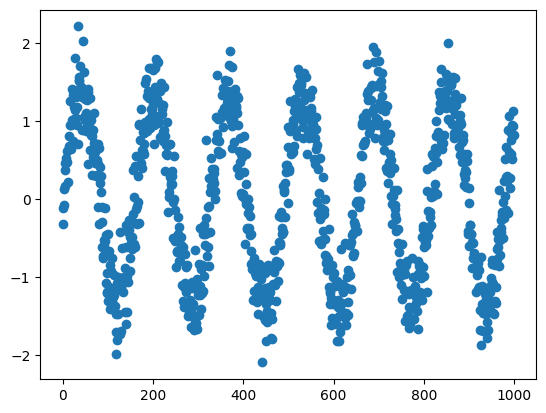

In [16]:
plt.scatter(np.arange(0, 1000), mat[10])